## Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. 
The dataset includes details like credit history, loan amount, their income, dependents etc.
You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df=pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#checking the shape
df.shape

(614, 13)

The dataset has 614 rows and 13 columns


In [4]:
#checking the description
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The Income column might have outliers and skewness since the 75th % value and the max value have a huge parity

The Coapplicant income might also contain outliers

In [5]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset contains both numerical and object columns

In [6]:
#checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Multiple columns have null values.

Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

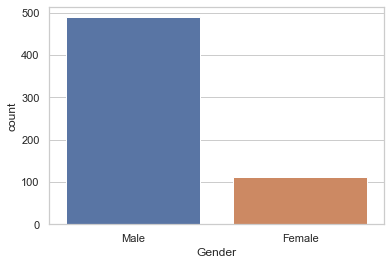

In [7]:
#checking columns with null values
print(df['Gender'].value_counts())
sns.set_theme(style='whitegrid')
sns.countplot(df['Gender'])

Catogory column with higher number of males, We can handle the null values using most frequent value

Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

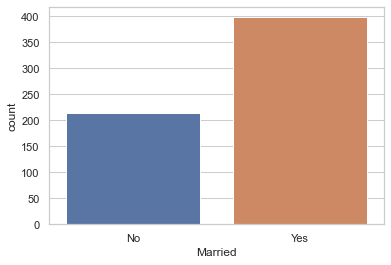

In [8]:
print(df['Married'].value_counts())
sns.countplot(df['Married'])

Two values catogory, Yes and No values

We can replace the null values with the most frequent

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

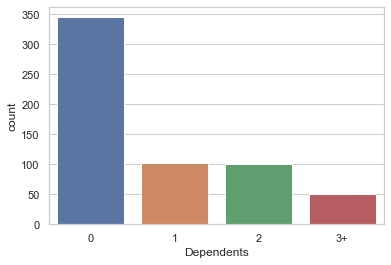

In [9]:
#checking columns with null values
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'])

Most of the applicants in the dataset has no dependants,

Null values can be replaced by mode

No     500
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

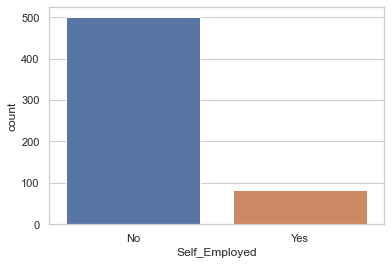

In [10]:
#checking columns with null values
print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'])

Most of loan applicants are not self employed
Replacing the null values with mode

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

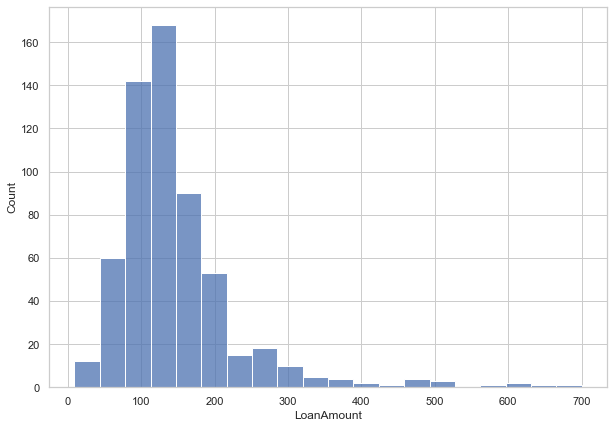

In [11]:
#checking columns with null values
print(df['LoanAmount'].value_counts())
plt.figure(figsize=(10,7))
sns.histplot(df['LoanAmount'],bins=20)

Most of the loan amount is between 100-200

We can replace the null values with mean

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

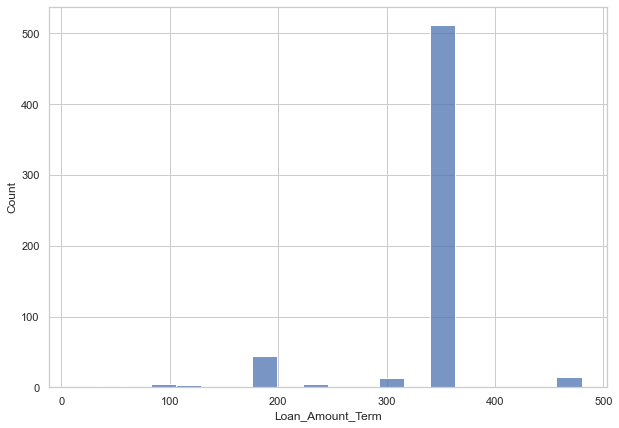

In [12]:
#checking columns with null values
print(df['Loan_Amount_Term'].value_counts())
plt.figure(figsize=(10,7))
sns.histplot(df['Loan_Amount_Term'],bins=20)

Majority takes the loan for a year

Replacing Nan values with mean

1.0    475
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

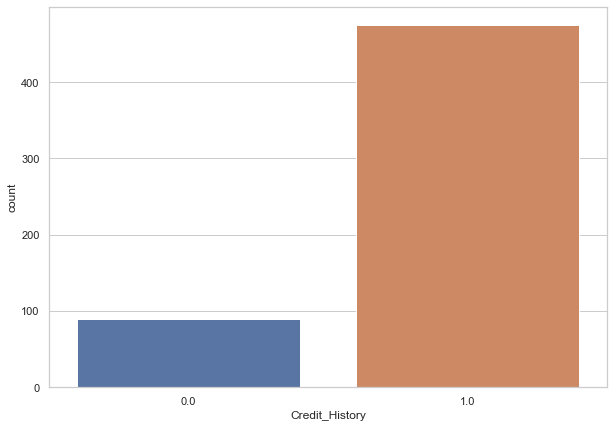

In [13]:
#checking columns with null values
print(df['Credit_History'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df['Credit_History'])

Majority of the applicants has a loan history, We can replace the Nan with mode

In [14]:
#handling Nan values
from sklearn.impute import SimpleImputer

In [15]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Gender'] = si.fit_transform(df['Gender'].values.reshape(-1, 1))
df['Married'] = si.fit_transform(df['Married'].values.reshape(-1, 1))
df['Dependents'] = si.fit_transform(df['Dependents'].values.reshape(-1, 1))
df['Self_Employed'] = si.fit_transform(df['Self_Employed'].values.reshape(-1, 1))
df['Credit_History'] = si.fit_transform(df['Credit_History'].values.reshape(-1, 1))


In [16]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#replacing the nan values with mean
df['LoanAmount'] = df['LoanAmount'].fillna(np.mean(df['LoanAmount']))
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#checking the columns
print(df['Loan_ID'].value_counts())
print(df['Loan_ID'].nunique())

LP002634    1
LP001027    1
LP002368    1
LP002537    1
LP001384    1
           ..
LP002585    1
LP002874    1
LP001086    1
LP002648    1
LP001478    1
Name: Loan_ID, Length: 614, dtype: int64
614


All the values in LoanId are unique
We can ignore the column.

In [20]:
#droping lon_ID
df.drop(['Loan_ID'],axis=1,inplace=True)

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

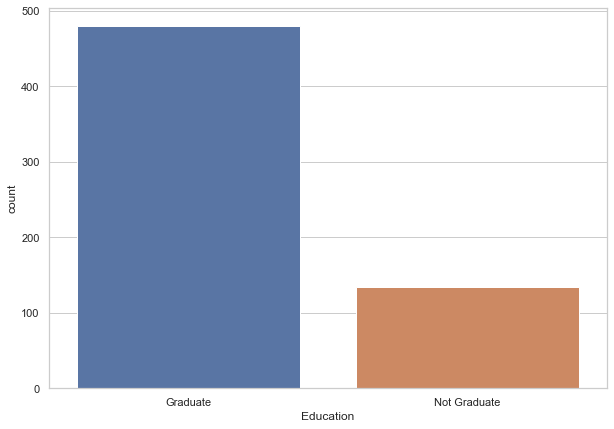

In [22]:
#checking columns with null values
print(df['Education'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df['Education'])

The education column has two major catogories, 

Most of the applicants are Graduates

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

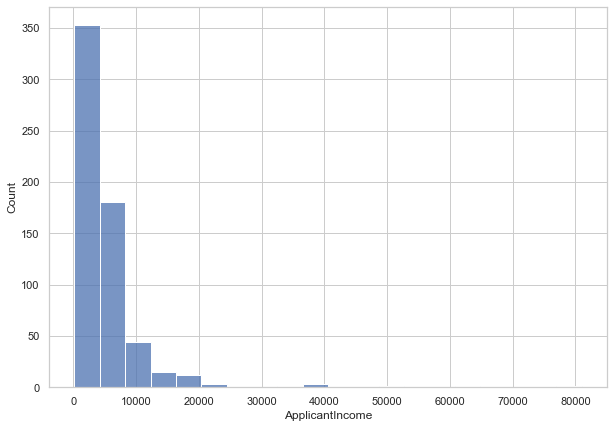

In [23]:
#checking columns
print(df['ApplicantIncome'].value_counts())
plt.figure(figsize=(10,7))
sns.histplot(df['ApplicantIncome'],bins=20)

Most of the applicants have income less than 10000

Possibility of an outlier

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

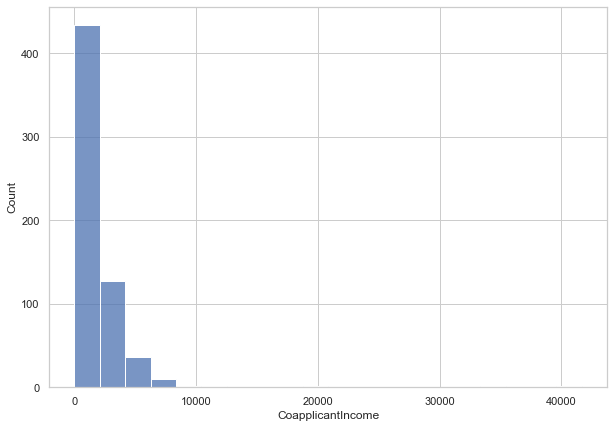

In [24]:
#checking columns
print(df['CoapplicantIncome'].value_counts())
plt.figure(figsize=(10,7))
sns.histplot(df['CoapplicantIncome'],bins=20)

The coapplicants income plot looks similar to the applicants income columns wiith majority of the people comes under the 10k mark

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

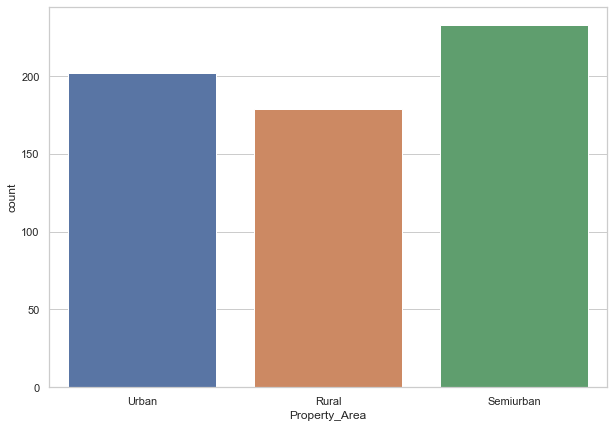

In [25]:
#checking columns
print(df['Property_Area'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df['Property_Area'])

Three major catogories
Most of the applicants comes from the semi urban area

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

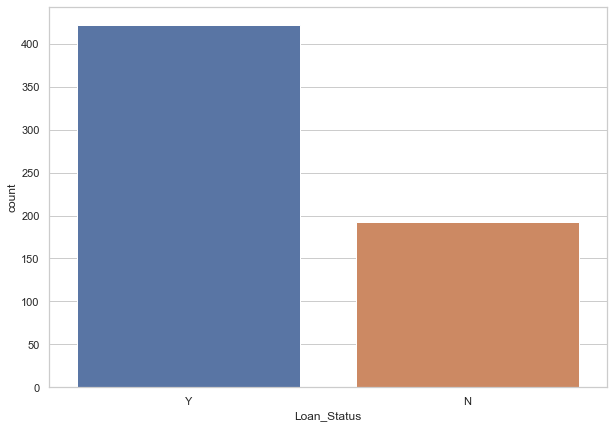

In [26]:
#checking columns
print(df['Loan_Status'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df['Loan_Status'])

The target column

The column seems imbalanced with the yes catogory significantly more than that of the 'No'.

#### Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

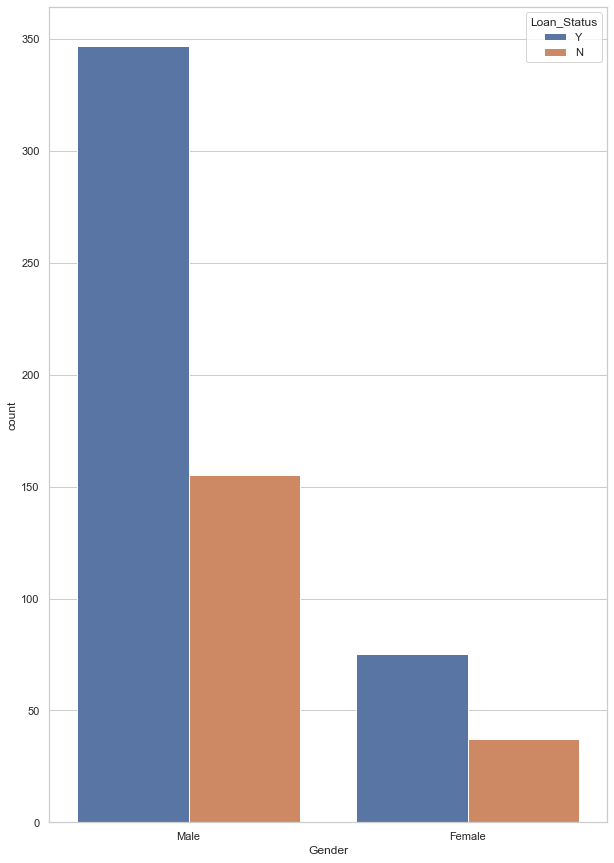

In [27]:
#plotting columns against target class
plt.figure(figsize=(10,15))
##plt.xticks(rotation=-60)
sns.countplot(x='Gender',hue='Loan_Status',data=df)

Male applicants has the highest chance of getting loan approved, considering the sample has high 'male' catogory

<AxesSubplot:xlabel='Married', ylabel='count'>

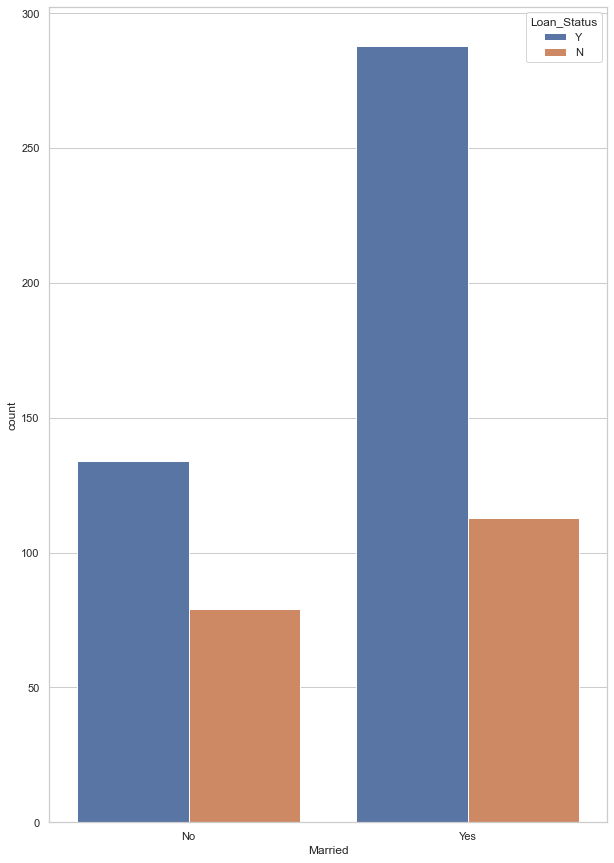

In [28]:
#plotting columns against target class
plt.figure(figsize=(10,15))
##plt.xticks(rotation=-60)
sns.countplot(x='Married',hue='Loan_Status',data=df)

Married people have more chance of getting loan sanctioned

<AxesSubplot:xlabel='Education', ylabel='count'>

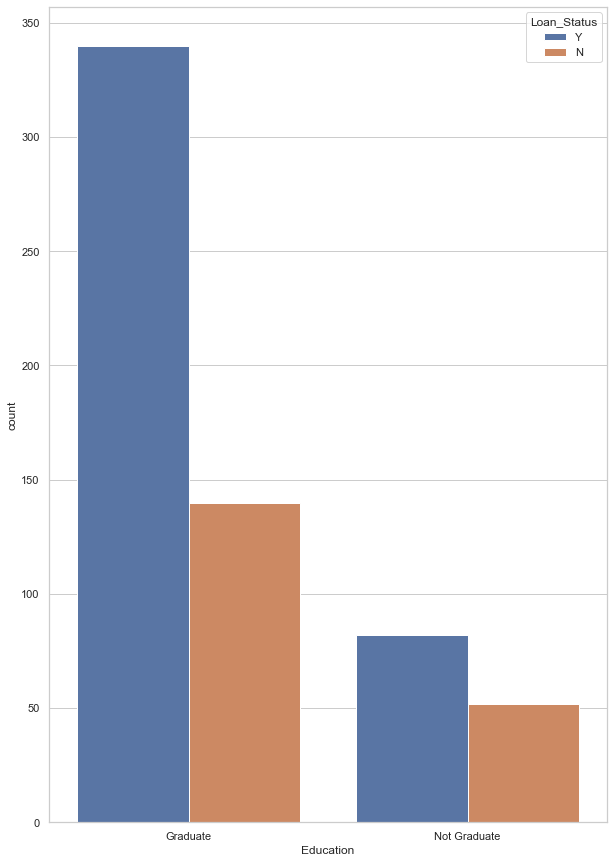

In [29]:
#plotting columns against target class
plt.figure(figsize=(10,15))
##plt.xticks(rotation=-60)
sns.countplot(x='Education',hue='Loan_Status',data=df)

Graduates has higher chances of getting loans approved

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

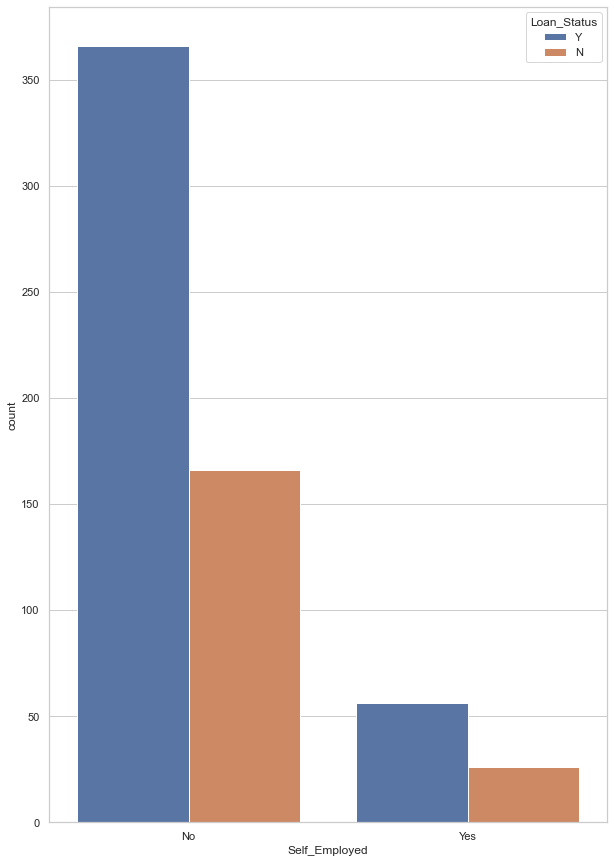

In [30]:
#plotting columns against target class
plt.figure(figsize=(10,15))
##plt.xticks(rotation=-60)
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

the chances of getting loan sanctioned based on self employed or not seems balanced

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

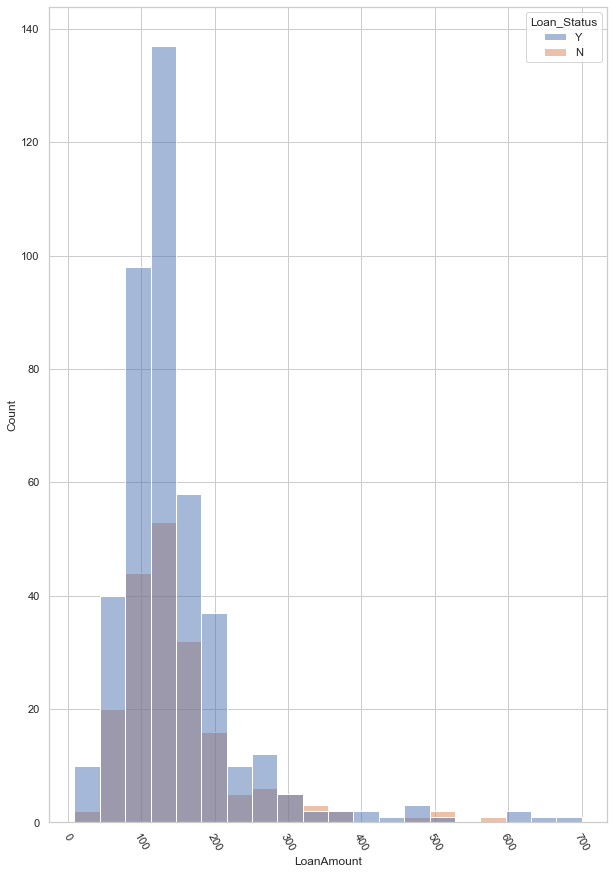

In [31]:
#plotting columns against target class
plt.figure(figsize=(10,15))
plt.xticks(rotation=-60)
sns.histplot(x='LoanAmount',hue='Loan_Status',data=df,bins=20)

Loans between 100-200 has a high aproval rate

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

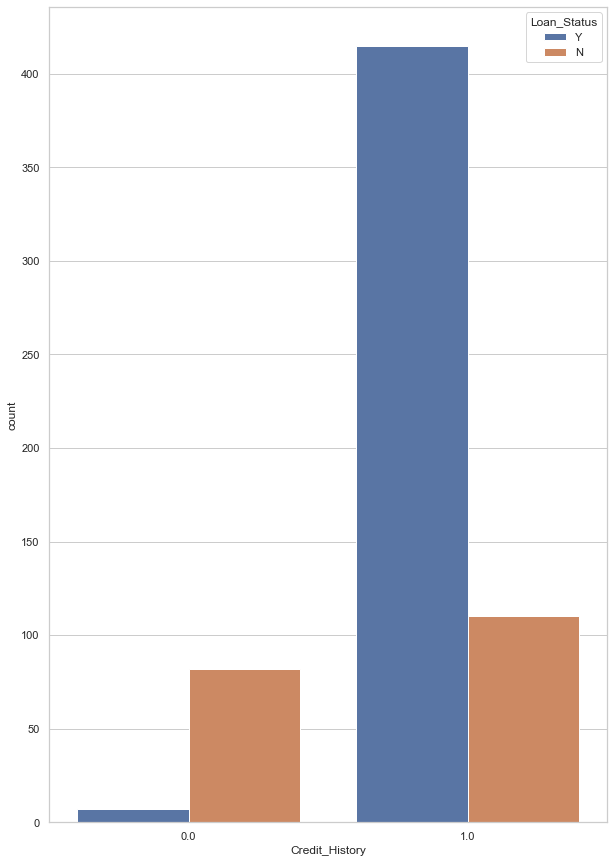

In [32]:
  
#plotting columns against target class
plt.figure(figsize=(10,15))
##plt.xticks(rotation=-60)
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

People with a loan history has the higher chance of getting the loan approved.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

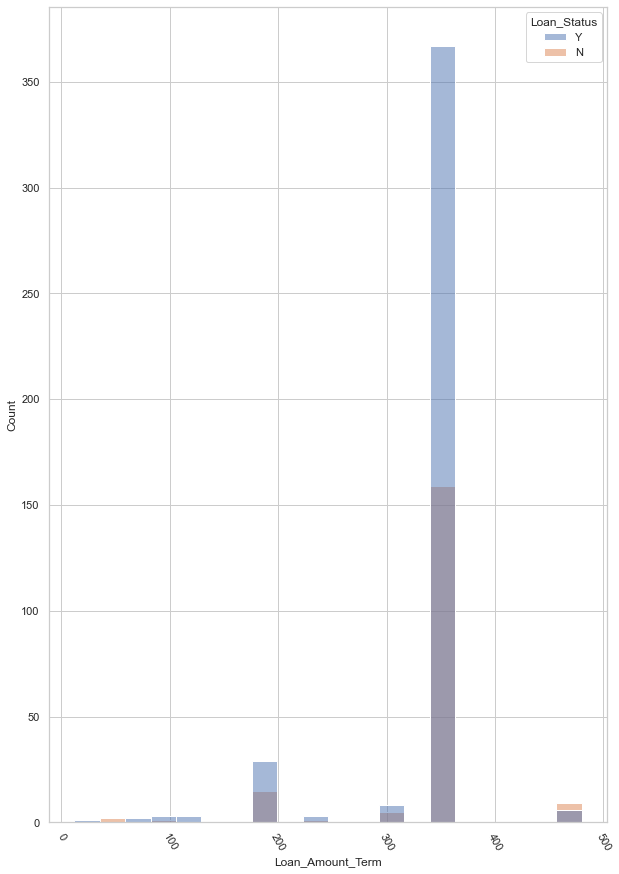

In [33]:
 
#plotting columns against target class
plt.figure(figsize=(10,15))
plt.xticks(rotation=-60)
sns.histplot(x='Loan_Amount_Term',hue='Loan_Status',data=df,bins=20)

360 days loans have a good approval rate

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

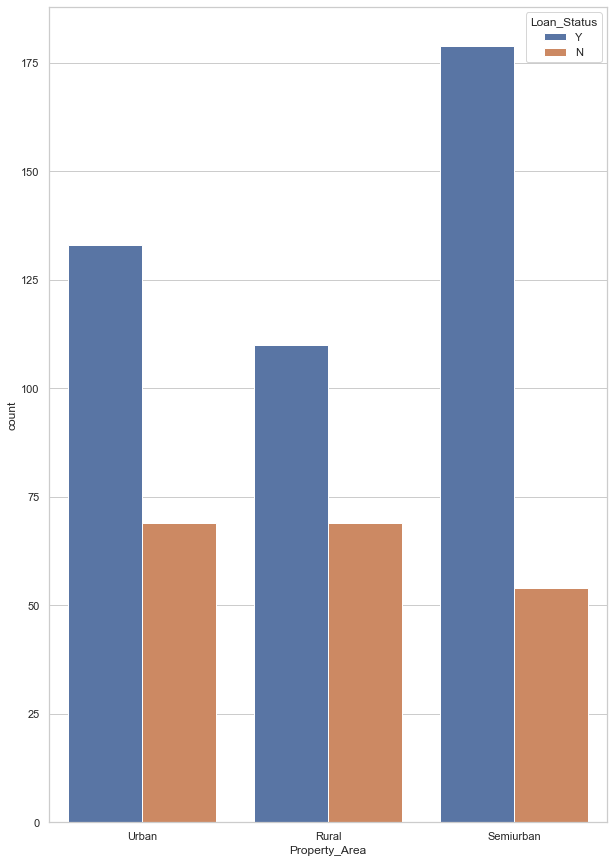

In [34]:
#plotting columns against target class
plt.figure(figsize=(10,15))
##plt.xticks(rotation=-60)
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

Semiurban applicants have a higher aproval rate,
The data set ha more applicants from semiurban region

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

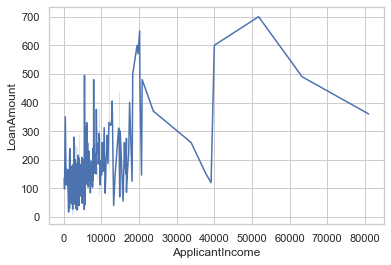

In [35]:
#plotting income vs loan amount
sns.lineplot(x='ApplicantIncome', y='LoanAmount', data = df)

There is a clear increase in loan amount as the income of the applicant increases.

<AxesSubplot:xlabel='Education', ylabel='count'>

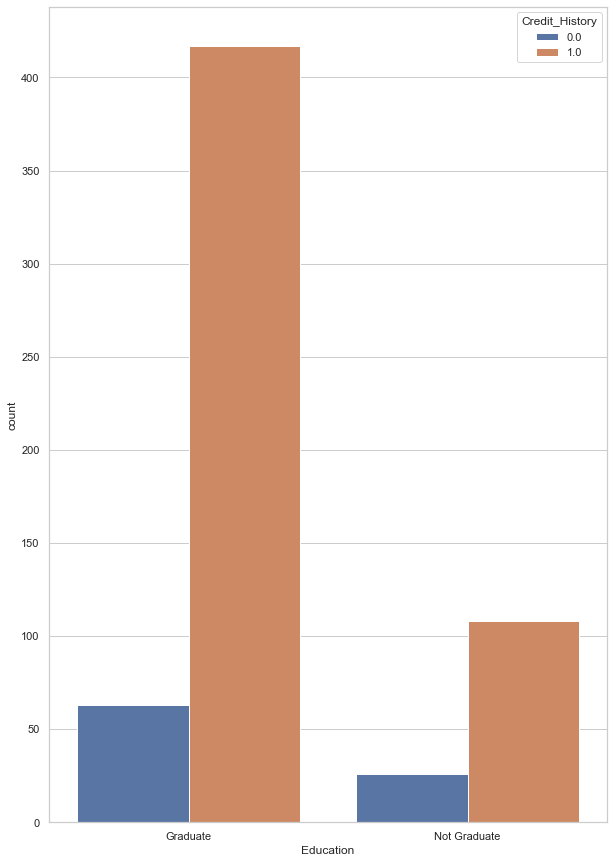

In [36]:
#plotting columns against target class
plt.figure(figsize=(10,15))
##plt.xticks(rotation=-60)
sns.countplot(x='Education',hue='Credit_History',data=df)

Credit history of applicants with regard of the education

In [37]:
#dividing num and cat cols
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 
            'Property_Area', 'Loan_Status']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

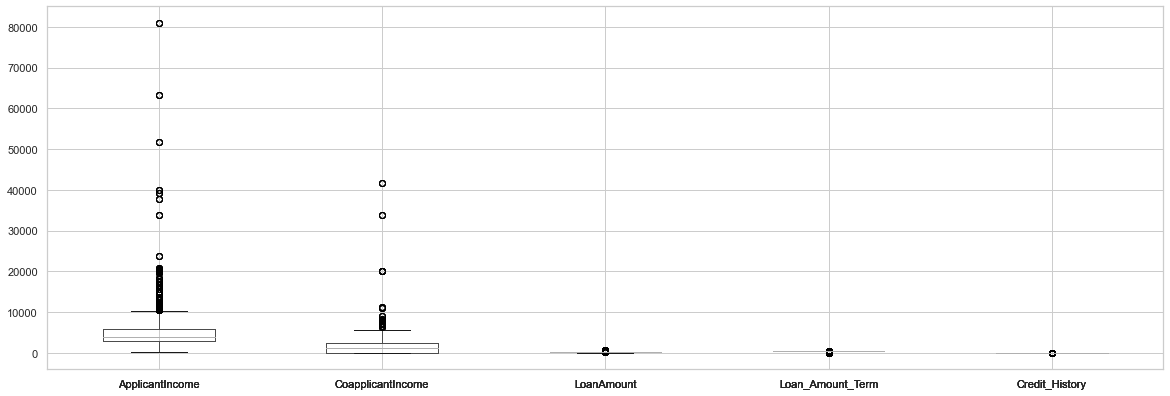

In [38]:
#checking outliers using boxplot
for i in num_cols:
    df.boxplot(figsize=[20,8])
    plt.subplots_adjust(bottom=0.25)

The boxplot is showing the presence of outliers

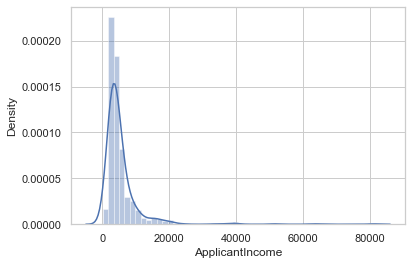

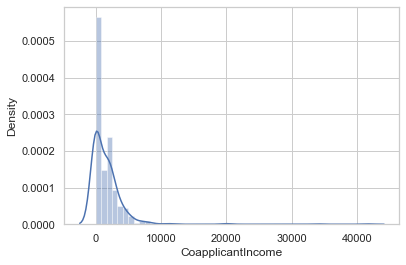

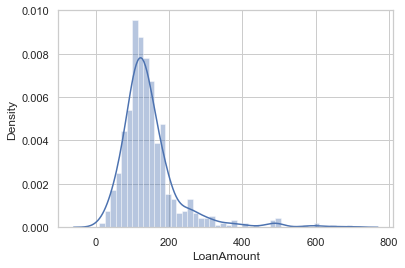

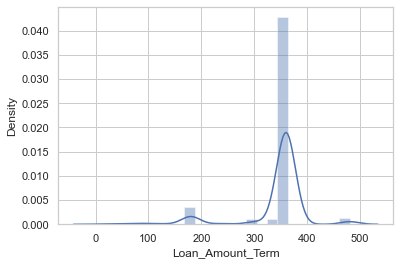

In [39]:
#checking skewness
for i in num_cols:
    plt.subplots()
    sns.distplot(df[i])

There seems to be a slight skewness in Loan amount column

### Encoding

In [40]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [42]:
#checking correlation
dfcor=df.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


<AxesSubplot:>

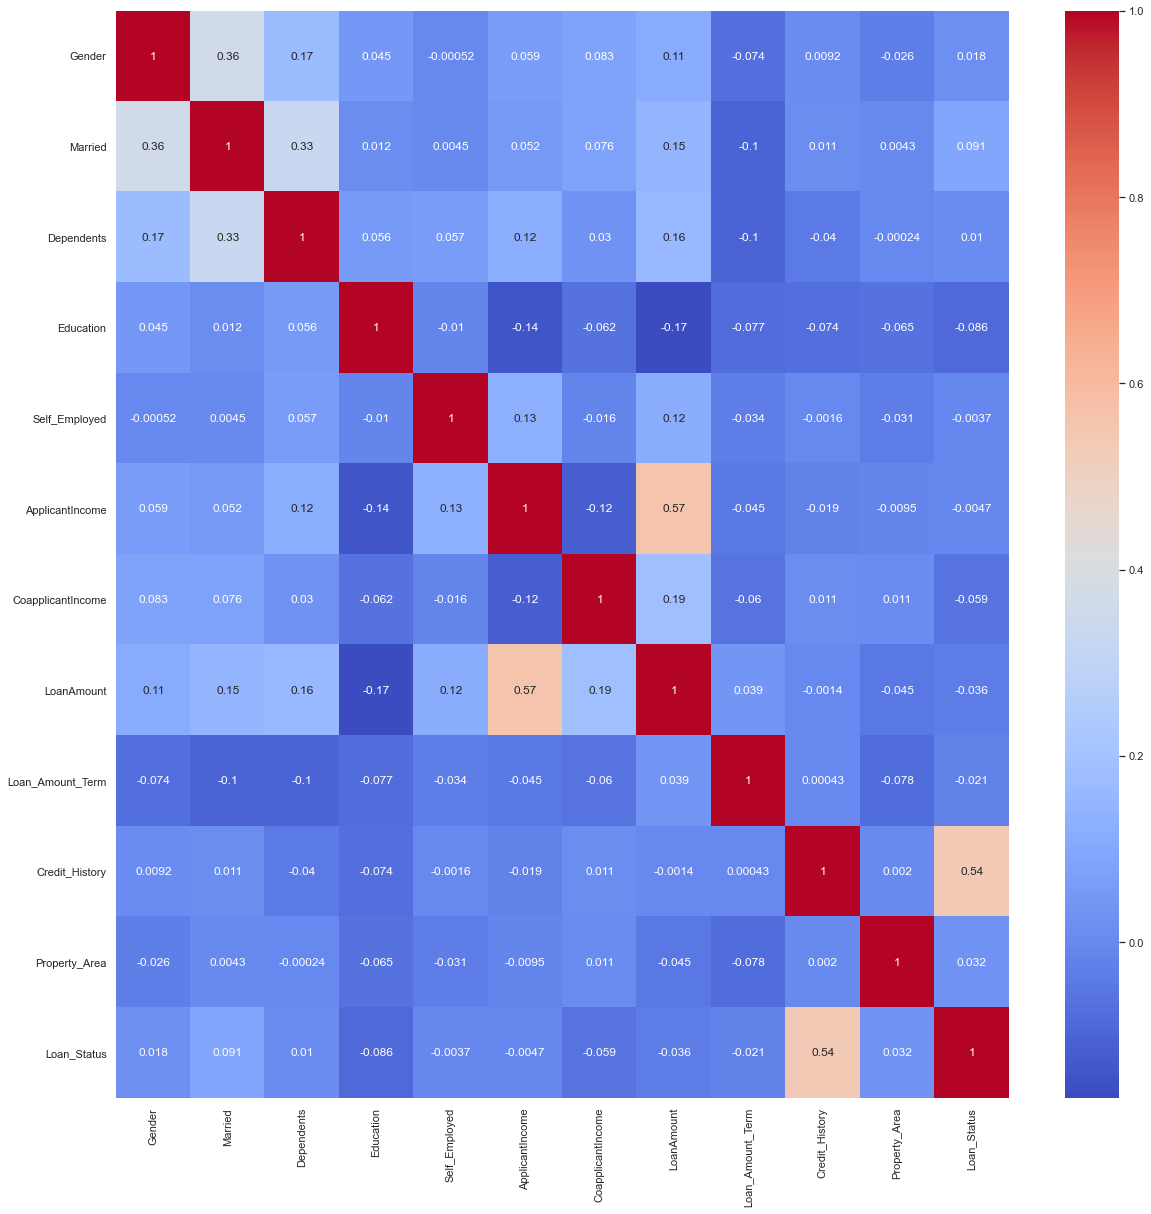

In [43]:
#plotting the correlation
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True,cmap="coolwarm")

Credit history seems to be having the highest possitive correlation to the loan status

In [44]:
#checking correlation to the target 
dfcor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

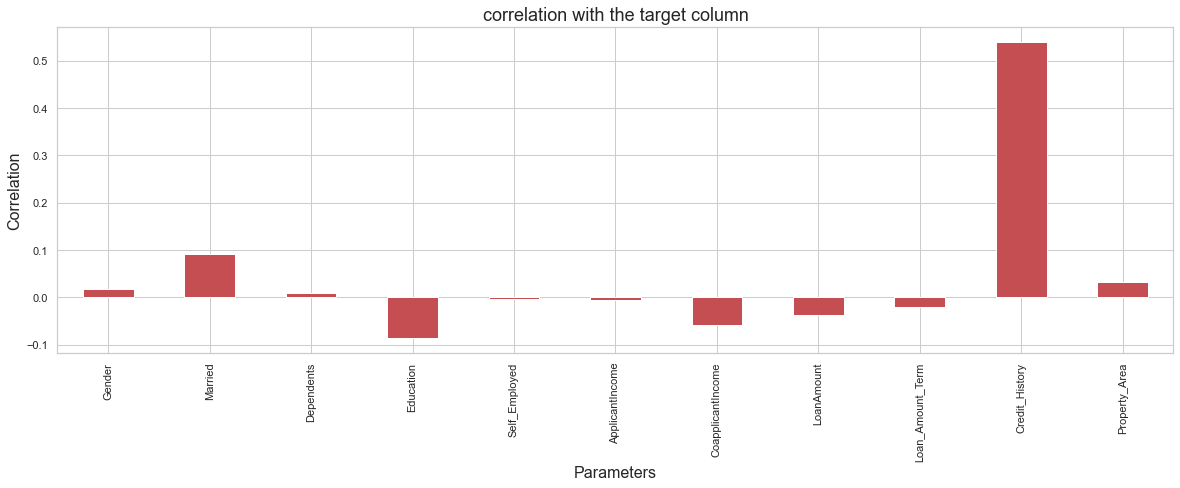

In [45]:
#plotting the correlation to the target column
plt.figure(figsize = (20,6))
dfcor['Loan_Status'].drop(['Loan_Status']).plot(kind = 'bar', color = 'r')
plt.xlabel('Parameters', fontsize = 16)
plt.ylabel('Correlation', fontsize = 16)
plt.title('correlation with the target column', fontsize = 18)
plt.show()

The credit history has possitive correlation

Education,loan amount,coapplicants income has a negative correlation


In [46]:
#Handling outliers
from scipy.stats import zscore

In [47]:
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [48]:
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(577, 12)

We are removing outliers

In [49]:
df=df_new

In [50]:
#handling skewness
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [51]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome']=np.sqrt(df['CoapplicantIncome'])
df['LoanAmount']=np.cbrt(df['LoanAmount'])


In [52]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome    0.207591
LoanAmount           0.017152
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [53]:
#splitting x and y
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

## Handling Imbalance

In [54]:
#oversampling
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)

In [55]:
x_over.shape

(796, 11)

In [56]:
y_over.shape

(796,)

In [57]:
#scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x_over)

In [58]:
#importing models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [59]:
#checking the best random state

lr=LogisticRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = .30, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test, predlr)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy',maxacc,'on random state',maxrs)

best accuracy 0.8200836820083682 on random state 68


In [60]:
#spitting with best random state
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = .30, random_state = 68)

In [61]:
x_train.shape

(557, 11)

In [62]:
y_train.shape

(557,)

In [63]:
y_test.shape

(239,)

In [64]:
x_test.shape

(239, 11)

In [65]:
def model(mod):
    print("Model:",mod)
    mod.fit(x_train, y_train)
    mod.score(x_train, y_train)
    pred = mod.predict(x_test)
    ##print(confusion_matrix(y_test, pred))
    print('\n')
    print('\n')
    ##print(classification_report(y_test, pred))
    crossval_scores = cross_val_score(mod, x_over, y_over, cv = 5)
    accuracy=accuracy_score(y_test, pred)
    print("Accuracy score:",accuracy)
    ##print('Cross validation Scores for ', mod)
    ##print(crossval_scores)
    print('\n')
    mean_crossval=crossval_scores.mean()
    print('Mean cross validation Score: ',mean_crossval)
    difference=accuracy-mean_crossval
    print('difference between crossvalidation score and actual score:',difference)

In [66]:
model(LogisticRegression())

Model: LogisticRegression()




Accuracy score: 0.8200836820083682


Mean cross validation Score:  0.7626336477987421
difference between crossvalidation score and actual score: 0.05745003420962613


In [67]:
model(GaussianNB())

Model: GaussianNB()




Accuracy score: 0.803347280334728


Mean cross validation Score:  0.7425314465408805
difference between crossvalidation score and actual score: 0.060815833793847474


In [68]:
model(RandomForestClassifier())

Model: RandomForestClassifier()




Accuracy score: 0.8870292887029289


Mean cross validation Score:  0.8318160377358492
difference between crossvalidation score and actual score: 0.05521325096707963


In [69]:
model(DecisionTreeClassifier())

Model: DecisionTreeClassifier()




Accuracy score: 0.7782426778242678


Mean cross validation Score:  0.7751965408805032
difference between crossvalidation score and actual score: 0.0030461369437646546


In [70]:
model(KNeighborsClassifier())

Model: KNeighborsClassifier()




Accuracy score: 0.6903765690376569


Mean cross validation Score:  0.706061320754717
difference between crossvalidation score and actual score: -0.015684751717060075


In [71]:
model(AdaBoostClassifier())

Model: AdaBoostClassifier()




Accuracy score: 0.8158995815899581


Mean cross validation Score:  0.7727672955974842
difference between crossvalidation score and actual score: 0.04313228599247387


In [73]:
k=['linear','poly','rbf']
for i in k:
    print('\n')
    print('SVC kernel:',i)
    print('\n')
    svc=SVC(kernel=i)
    model(svc)



SVC kernel: linear


Model: SVC(kernel='linear')




Accuracy score: 0.803347280334728


Mean cross validation Score:  0.7412735849056604
difference between crossvalidation score and actual score: 0.0620736954290676


SVC kernel: poly


Model: SVC(kernel='poly')




Accuracy score: 0.42677824267782427


Mean cross validation Score:  0.5464465408805032
difference between crossvalidation score and actual score: -0.11966829820267888


SVC kernel: rbf


Model: SVC()




Accuracy score: 0.42677824267782427


Mean cross validation Score:  0.5476650943396226
difference between crossvalidation score and actual score: -0.12088685166179836


Selecting Decsion Tree classifier for hyper parameter Tuning based on cross validation

### Hyper Parameter Tuning


In [74]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini', 'entropy'],'min_samples_leaf':[5,10],'max_depth':[None,1,3,5,10],'min_samples_split':[5,10],'min_samples_leaf':[5,10]}

In [76]:
dtc = DecisionTreeClassifier()
dtc_f = GridSearchCV(dtc, parameters)
dtc_f.fit(x_train, y_train)

print(dtc_f.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5}


In [77]:
#running with best parameters
dtc_final = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, min_samples_leaf= 10, min_samples_split= 5)
dtc_final.fit(x_train, y_train)
pred_dtc = dtc_final.predict(x_test)
print('Accuracy Score  : ', dtc_final)
print(accuracy_score(y_test, pred_dtc))
print(confusion_matrix(y_test, pred_dtc))
print(classification_report(y_test, pred_dtc))

Accuracy Score  :  DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=5)
0.8451882845188284
[[ 66  36]
 [  1 136]]
              precision    recall  f1-score   support

         0.0       0.99      0.65      0.78       102
         1.0       0.79      0.99      0.88       137

    accuracy                           0.85       239
   macro avg       0.89      0.82      0.83       239
weighted avg       0.87      0.85      0.84       239



### Accuracy score= 0.8451882845188284


#### AUC_ROC

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [79]:
y_pred_prob = dtc_final.predict_proba(x_test)[:, 0]

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

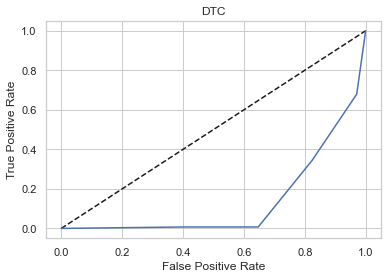

In [81]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DTC')
plt.show()

In [82]:
import joblib
joblib.dump(dtc_final, 'Loan_pred')
model = joblib.load('Loan_pred')
model.predict(x_train)

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0.

In [83]:
conclusion = pd.DataFrame([model.predict(x_test)[:], pred_dtc[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
Original,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


### Final Accuracy score= 0.8451882845188284